## Collatz lambda notebook

In [7]:
"""
This notebook analyses the binary growth of a Collatz sequence, denoted by lambda.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from math import log2
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from collatz import commons


# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 50
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

# START_VALUE = 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate a collatz components
analysis_frame = commons.odd_collatz_sequence_components(
    START_VALUE, K_FACTOR, MAX_ITERATIONS)

# Derive new fields
analysis_frame["alpha_i"] = analysis_frame["decimal"].apply(commons.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype('int64')
analysis_frame["alpha"] = analysis_frame["alpha_i"].cumsum()

analysis_frame["log2"] = analysis_frame["decimal"].apply(log2)
analysis_frame["bin_str"] = analysis_frame["decimal"].apply(commons.to_binary)
analysis_frame["bin_len"] = analysis_frame["log2"].astype('int64') + 1
analysis_frame["lambda_hyp"] = (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["lambda_max"] = analysis_frame["lambda_hyp"].astype('int64') + 2

prev_bin_len = list(analysis_frame[:-1]["bin_len"])
prev_bin_len.insert(0, prev_bin_len[0])
analysis_frame["bin_diff"] = analysis_frame["bin_len"] - pd.Series(prev_bin_len)

analysis_frame["lambda_i"] = analysis_frame["bin_diff"]
analysis_frame.loc[analysis_frame["lambda_i"] < 0, "lambda_i"] = 0
analysis_frame["lambda"] = analysis_frame["lambda_i"].cumsum()

next_decimal = list(analysis_frame[1:]["decimal"])
next_decimal.append(0)
analysis_frame["next_decimal"] = next_decimal

# Remove final result
analysis_frame = analysis_frame[:-1]

# Validate lambda
l_max_valid = int((analysis_frame["lambda"] > analysis_frame["lambda_max"]).sum()) < 1

# Print results
print_frame = analysis_frame[[
    "n", "variable", "decimal", "next_decimal",
    "log2", "bin_str", "bin_len",
    "lambda_i", "lambda", "lambda_max",
    "alpha"
]]

print_frame.columns = [
    "n","var", "dec", "next", 
    "log2", "b_str", "b_len",
    "l_i", "l", "l_max",
    "a"
]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      " Lambda max valid:", l_max_valid,
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(), "\n")

Start value: 71  K: 3  Lambda max valid: True 

      n     var   dec  next       log2           b_str  b_len  l_i   l  l_max   a
0     1     v_i    71   213   6.149747         1000111      7    0   0      3   0
1     1    kv_i   213   214   7.734710        11010101      8    1   1      3   0
2     1  kv_i+1   214   107   7.741467        11010110      8    0   1      3   1
3     2     v_i   107   321   6.741467         1101011      7    0   1      5   1
4     2    kv_i   321   322   8.326429       101000001      9    2   3      5   1
5     2  kv_i+1   322   161   8.330917       101000010      9    0   3      5   2
6     3     v_i   161   483   7.330917        10100001      8    0   3      6   2
7     3    kv_i   483   484   8.915879       111100011      9    1   4      6   2
8     3  kv_i+1   484   121   8.918863       111100100      9    0   4      6   4
9     4     v_i   121   363   6.918863         1111001      7    0   4      8   4
10    4    kv_i   363   364   8.503826       10110

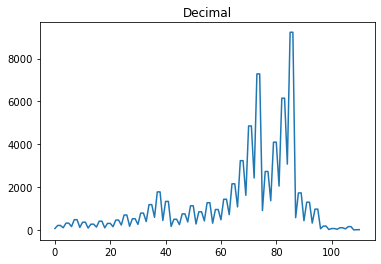

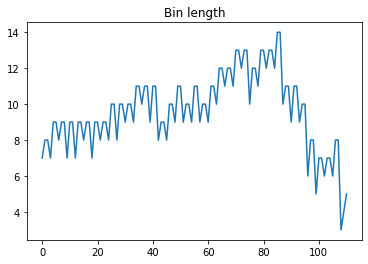

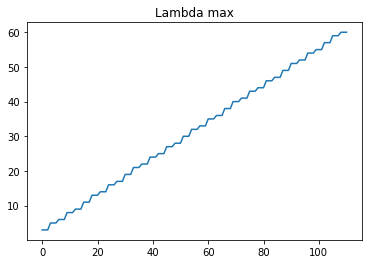

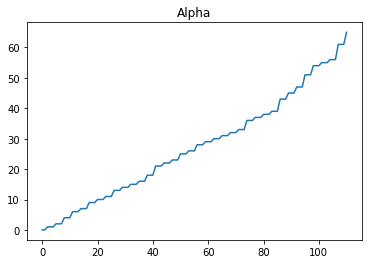

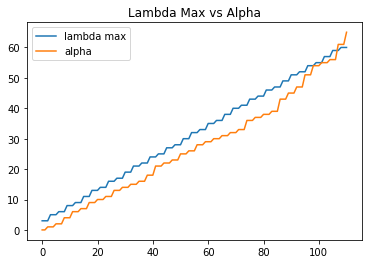

In [8]:
#Plot results
# Decimal
plt.figure()
plt.title("Decimal")
plt.plot(analysis_frame["decimal"], "-")

# Bin len
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")

plt.figure()
plt.title("Lambda max")
plt.plot(analysis_frame["lambda_max"], "-")

plt.figure()
plt.title("Alpha")
plt.plot(analysis_frame["alpha"], "-")

plt.figure()
plt.title("Lambda Max vs Alpha")
plt.plot(analysis_frame["lambda_max"], label="lambda max")
plt.plot(analysis_frame["alpha"], label="alpha")
plt.legend()

plt.show()